# Prediction of Covid-19 cases & proposing faster diagnosis using chest X-ray image recognition method.

In [102]:
import os

cwd = os.getcwd()
print(cwd)

C:\Users\almei\Downloads\chest_xray


In [103]:
import os

new_directory = "C:\\Users\\almei\\Downloads\\chest_xray"
os.chdir(new_directory)

In [104]:
import os

cwd = os.getcwd()
print(cwd)

C:\Users\almei\Downloads\chest_xray


In [105]:
import os
import pathlib

# Some basic libraries that help us create dataframes and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

# Importing Deep Learning Libraries 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

# Tensorflow and Keras Version
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

# To Suppress any Un-necessary warnings
import warnings
warnings.filterwarnings('ignore')

Tensorflow Version: 2.11.0
Keras Version: 2.11.0


In [106]:
# Here, we define the paths where we have our data for training, testing and predictions
data_dir_train = pathlib.Path("C:\\Users\\almei\\Downloads\\chest_xray\\train")
data_dir_test = pathlib.Path("C:\\Users\\almei\\Downloads\\chest_xray\\test")
data_dir_val = pathlib.Path("C:\\Users\\almei\\Downloads\\chest_xray\\pred")

In [107]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 7315
Number of Images in Test: 620
Number of Images in Validation: 9


In [108]:
height = 150
width = 150
batch_size = 16
seed = 42 # For reproducibility 

#### Here, we are defining some variables which will be commonly used in the further codes.

In [109]:
train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 5852 files for training.


#### Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!
#### First we ask Keras to create a "training" dataset with 0.2 as validation split.
#### The "validation_split" value is set to 0.2, it means that 20% of the data will be used for validation and 80% of the data will be used for training. This split is done to ensure that the model is not overfitting the data. 

In [110]:
val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 1463 files for validation.


#### Second we ask Keras to create a "validation" dataset with 0.2 as validation split.

In [111]:
class_names = train_ds.class_names
class_names

['COVID', 'NORMAL']

#### Finally we are storing all the available class names from the dataset. (NORMAL and COVID)
#### This also ensures, we have created the dataset successfully!

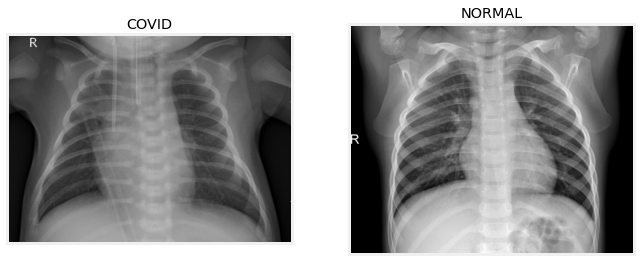

In [112]:
plt.figure(figsize=[10,8])

for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

#### In the above code have have definied the Canvas size
#### Next we have just picked one image from the unique categories and display it.

In [ ]:
import pandas as pd
from PIL import Image

image_path = "C:\\Users\\almei\\Downloads\\chest_xray\\train\\COVID"
images = []
for i in range(1,30):
    image = Image.open(image_path+"/PNEUMONIA_{}.jpeg".format(i))
    images.append(image)
    
    im_array = np.array(image)
    plt.imshow(im_array)
    plt.show()


#### Here, we load images and store them in a list and Visualize the images.


In [114]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=L size=1096x808 at 0x26C2A19FCD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1056x696 at 0x26C22DA0430>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=885x592 at 0x26C1B5745E0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=848x616 at 0x26C1ECEC040>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1010x676 at 0x26C204E0580>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1528x1056 at 0x26C26910CD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1120x776 at 0x26C2821DFA0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1024x616 at 0x26C282B7A00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1008x768 at 0x26C2821DA00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=992x776 at 0x26C283DBF70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1648x1592 at 0x26C28212C10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1808x1448 at 0x26C283BF310>,
 <PIL.JpegIm

In [ ]:
images = [np.array(img) for img in images]
images = [np.array(img) if len(img.shape) >= 3 else np.array(img)[..., np.newaxis] for img in images]
for i, img in enumerate(images):
    print("Image {} has shape: {}".format(i, img.shape))

#### The above code is transforming a list of images into a list of numpy arrays.
#### This code is useful for checking the shapes of the images and making sure that they are in the correct format to be processed by a machine learning model. The desired shape of the images depends on the specific model being used, but they are typically expected to have three dimensions: height, width, and number of channels. 

In [116]:
import pandas as pd
from PIL import Image
import numpy as np

# Load images and store them in a list
images = []

labels = []
for i in range(1,30):
    image = Image.open(image_path+"/PNEUMONIA_{}.jpeg".format(i))
    images.append(image)

# Create a DataFrame
df = pd.DataFrame({"Image": images})

# Calculate mean pixel values for each image and add to the DataFrame
df["Mean_Pixel_Values"] = [np.mean(np.array(img)) for img in df["Image"]]

# Perform EDA
# For example, get the mean pixel values of the first image
mean_pixel_values = df["Mean_Pixel_Values"].iloc[0]
print("Mean pixel values:", mean_pixel_values)

Mean pixel values: 118.63259625460721


#### This code is loading images and storing them in a list called images. The Image.open method from the PIL library is used to load each image using a loop that ranges from 1 to 30. The filenames are constructed using string formatting with the format method and the index i. The images are then stored in the images list.
#### Next, a pandas DataFrame called df is created with a single column, "Image", which contains the images from the images list.
#### The next step calculates the mean pixel values for each image and adds the values to the DataFrame as a new column, "Mean_Pixel_Values". 

In [ ]:
# Plotting histogram of pixel values
images = np.array(images)
images = images.reshape(images.shape[0], -1)

images = np.array(images)

for i in range(len(images)):
    plt.hist(images[i].ravel(), bins=256, color='blue', alpha=0.5)
    plt.show()

#### This code would display a histogram for each image in the images list.
#### It will loop through all the images in the images list and display a separate histogram for each image.

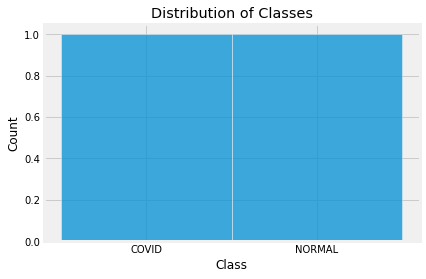

In [118]:
# Plot a histogram of the labels to see the distribution of the classes
import seaborn as sns
labels = np.array(class_names)
sns.histplot(labels, kde=False)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()






# CNN model

In [119]:
# Here we start building our model in Keras:

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [120]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.

In [121]:
!pip install visualkeras

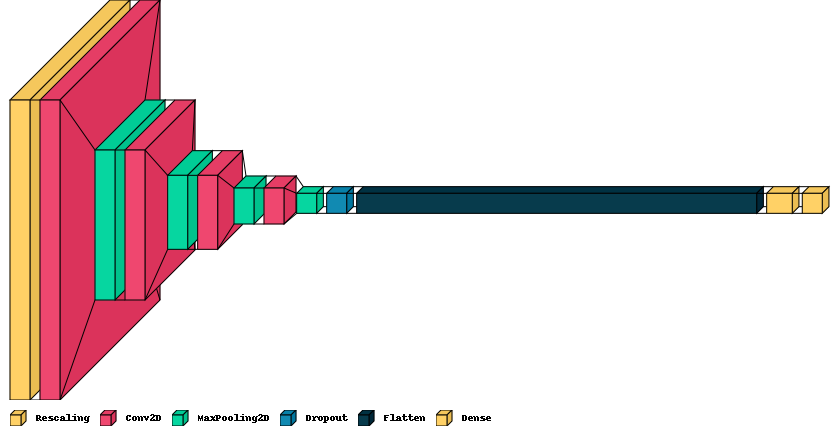

In [122]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [123]:
# Finally we are going to train our model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
366/366 [==============================] - 104s 280ms/step - loss: 0.2622 - accuracy: 0.8891 - val_loss: 0.1440 - val_accuracy: 0.9481
Epoch 2/20
366/366 [==============================] - 146s 399ms/step - loss: 0.1581 - accuracy: 0.9419 - val_loss: 0.1496 - val_accuracy: 0.9405
Epoch 3/20
366/366 [==============================] - 96s 260ms/step - loss: 0.1267 - accuracy: 0.9535 - val_loss: 0.1236 - val_accuracy: 0.9522
Epoch 4/20
366/366 [==============================] - 90s 243ms/step - loss: 0.1040 - accuracy: 0.9588 - val_loss: 0.1238 - val_accuracy: 0.9535
Epoch 5/20
366/366 [==============================] - 88s 239ms/step - loss: 0.0896 - accuracy: 0.9648 - val_loss: 0.1069 - val_accuracy: 0.9590
Epoch 6/20
366/366 [==============================] - 97s 264ms/step - loss: 0.0760 - accuracy: 0.9735 - val_loss: 0.1051 - val_accuracy: 0.9658
Epoch 7/20
366/366 [==============================] - 107s 292ms/step - loss: 0.0708 - accuracy: 0.9751 - val_loss: 0.0985 - val

#### You would want the loss to decrease over time and the accuracy to increase, indicating that the model is learning and improving its performance. If the loss and accuracy are not improving, or if the loss is increasing and the accuracy is decreasing, it may indicate that the model is overfitting or underfitting the data.
#### As we can see in the above model the loss is descreasing and accuracy is increasing, hence the model is performing well.

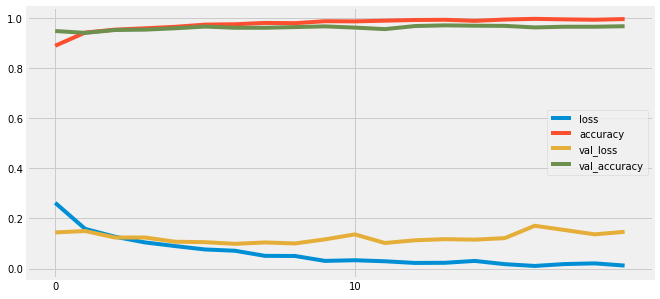

In [124]:
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

#### Next we are going to plot a graph to check the loss and accuracy as the model trained for 20 epochs for both train and validation.

# Evaluating the model

In [125]:
# To evaluate our model, we are going to make use of the "test" dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_test,
seed=seed,
image_size=(height,width),
batch_size=batch_size)

Found 620 files belonging to 2 classes.


In [126]:
model.evaluate(test_ds, batch_size=batch_size)

39/39 [==============================] - 4s 101ms/step - loss: 0.1306 - accuracy: 0.9694


[0.13059045374393463, 0.9693548679351807]

# Saving Our Model

In [127]:
model.save("./xray_model.h5")

In [128]:
cwd = os.getcwd()
print(cwd)

C:\Users\almei\Downloads\chest_xray


# Prediction Using the Model

1/1 [==============================] - 0s 69ms/step


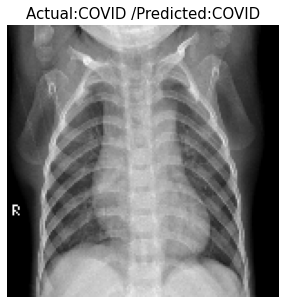

In [133]:
# Loading the .h5 model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

# Defining an image path from the "pred" folder:
image_path = "C:\\Users\\almei\\Downloads\\chest_xray\\pred\\COVID\\NORMAL_1.jpeg"

# Preprocessing the image to 150x150x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'COVID']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = classes[np.argmax(predictions, axis=1)[0]]

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()

#### The image is resized to 150x150x3 and the resulting array is passed as input to the model's predict method to get the predictions. The image is displayed along with the actual and predicted class labels as the title of the plot.

In [ ]:
sizes = [img.size for img in images]
widths = [size[0] for size in sizes]
heights = [size[1] for size in sizes]
plt.hist(widths, bins=20, alpha=0.5, label="Width")
plt.hist(heights, bins=20, alpha=0.5, label="Height")
plt.legend()
plt.xlabel("Size (pixels)")
plt.ylabel("Count")
plt.title("Distribution of Image Sizes")
plt.show()

# Ethical Assessment

# A. Data Collection
A.1 Informed consent: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

#### Informed consent should be obtained in writing and should include a clear explanation of what the individual is agreeing to and what their rights are.
#### Our dataset includes xray images, and the dataset is extracted from Kaggle.  While getting the dataset from Kaggle we have not got any personal information, hence privacy and confidentiality of the data is implemented.

 A.2 Collection bias: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

#### To minimize collection bias in X-ray image datasets, it's important to ensure that the dataset is diverse and representative of the population that the model will be used on. This can be done by collecting X-rays from a variety of individuals, including those with different ages, ethnicities, and medical histories. We don’t have much of these information.

A.3 Limit PII exposure: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn’t relevant for analysis?


#### Due to the lack of any such information on the data sources, the dataset does not reveal any personally identifying information. During the extraction of images the privacy of data providers was respected.

A.4 Downstream bias mitigation: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

#### Downstream bias refers to the biases that are introduced into machine learning models during the training, validation, or testing phase. This type of bias can result in models that perform poorly on certain populations or demographics, and can limit the usefulness of the models for real-world applications.

# B. Data Storage
B.1 Data security: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

#### The group is aware of how crucial it is to handle the photos that were retrieved with care for the purposes of this research. The team members will ensure that only the five other members of the group have access to or utilise the data by keeping access restricted to themselves only. 

B.2 Right to be forgotten: Do we have a mechanism through which an individual can request their personal information be removed?

#### We don’t have any personal information.
B.3 Data retention plan: Is there a schedule or plan to delete the data after it is no longer needed?

#### We are using the data only for project purpose. Hence, data will be removed from all our devices after our project is done.

# C. Analysis
C.1 Missing perspectives: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?

N/A

C.2 Dataset bias: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

#### The distribution of the classes in our picture collection, which contains 7943 photos, is as follows: COVID - 4269, Normal - 3666. The statistics are obviously out of proportion. These photographs will be used to train a machine learning model, and the more examples the model sees, the better. Our model's performance would also be affected by how much of a certain class of photos we used to train it with in comparison to other classes.

C.3 Honest representation: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

#### The team has concentrated its efforts on accurately portraying the data in this data assessment in order to guide the project in the proper path rather than leading it wrong.

C.4 Privacy in analysis: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

#### There is no PII information to be used throughout the course of the project.
C.5 Auditability: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

#### The best possible documentation of the project's steps will be performed, including code with elaborative comments and adding notes to each method used to build the model.

# D. Modeling

We are currently working on modles for our dataset, to get an idea how the dataset can fit in the model. Trying to understand our dataset better.

•	D.1 Proxy discrimination: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

•	  D.2 Fairness across groups: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

•	  D.3 Metric selection: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

•	  D.4 Explainability: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

•	  D.5 Communicate bias: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?


#### Ethical Assessment for data collection and usage**
Data Science Ethics Checklist

CONSENT: We are only utilising this data for research purposes, and we must cite or offer a link to this dataset as a reference. We did not obtain any personally identifiable information when extracting the dataset.

CLARITY: We will not share this data with any business authority and will only use it for model training. 

CONSISTENCY: This dataset is reliable as refered from Kaggel.

CONTROL: We have no control on this dataset as we refered this from Kaggle.

CONSEQUENCES: There will no such consequences of this dataset and we are using this for study purpose

# FORECASTING USING ARIMA MODEL

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

# **Load Dataset**

In [ ]:
df= pd.read_csv("C:\\Users\\almei\\Downloads\\cleaned_data.csv")


train, test = train_test_split(df, test_size=0.2)

#train =df[1:6552].values
#test=df[6553:7272].values
#train= pd.read_csv("cleaned_data.csv")
#test=pd.read_csv("cleaned_data.csv")

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train['Total deaths'].values)
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [ ]:
train.head()

In [ ]:
len(df) 

**The above output shows that we have total 4681 rows.**

**The column 'Total Cases’ and 'Total Deaths' contains significant information about the COVID cases. They will be useful to get details about the COVID**

# Assesment of Data Quality


In [ ]:
# identifying issues in all the columns

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Check for incorrect data types
incorrect_dtypes = df.dtypes[df.dtypes == 'object']
print(incorrect_dtypes)

# Check for outliers
outliers = df[(df > 3*df.std()).any(axis=1)].dropna(how='all')
print(outliers)

**Checking the completeness, accuracy, consistency, and uniformity of the data.**

**Completeness:** Check if all the necessary fields have values. You can use the .isnull() method in Pandas to find missing values.

**Accuracy:** Check if the values are correct. You can use regular expressions, data validation functions, or data profiling techniques to identify incorrect values.

**Consistency:** Check if the data is consistent with the constraints and business rules. For example, you can check if the values in a date column are in the correct date format, or if the values in an total death column are positive numbers.

**Uniformity:** Check if the data is uniform across all columns. For example, you can check if the values in a date  column are formatted in the same way.

# **Data Validation**

In [ ]:
# Load the data into a Pandas data frame
# Define the validation tests
def validate_data(df):
    # Check if all required columns are present
    required_columns = ['Total Cases', 'Total deaths']
    missing_columns = [col for col in required_columns if col not in df.columns]
    assert not missing_columns, f"The following columns are missing: {missing_columns}"

    # Check if all values in 'column1' are positive
    assert (df['Total Cases'] >= 0).all(), "Values in 'Total Cases' should be positive"

    # Check if all values in 'column2' are within a specific range
    min_value = 0
    max_value = 99999999
    assert ((df['Total deaths'] >= min_value) & (df['Total deaths'] <= max_value)).all(), \
           f"Values in 'Total deaths' should be between {min_value} and {max_value}"

    # Check if all values in 'column3' are unique
    # assert df['Continent'].is_unique, "Values in 'Continent' should not be unique"

# Run the validation tests
validate_data(df)

# If all tests pass, the code will continue to run
print("Data validation passed successfully!")

**The output above shows all the records are in the range we specified. Let’s have a look at the dataframe summary to check the same.**


# **Data Fitness**

In [ ]:
# Get a quick summary of the data
summary = df.describe()

print(summary)

# Get a quick overview of the data
overview = df.info()

print(overview)

#**Data fitness for answering research questions**

---



#1. Which machine learning timeseries Model works best for forecasting Covid-19 cases?

As if now, we have used two models i.e., ARIMA and Holt Winters Method. 

**Holt-Winters Method:** The Holt-Winters method is an extension of exponential smoothing that considers trends in the data. 
It uses a weighted average of past observations, as well as a smoothed estimate of the trend, to make predictions about future observations.

**ARIMA:** AutoRegressive Integrated Moving Average is a popular model for time series forecasting.
It models the dependencies between an observation and a residual error, and the dependencies between residual errors at prior time steps.

**To say which Model is best is too early as we are doing still working on it.**

#2. Does the required data in the dataset is enough to make a forecasting of COVID-19?
Yes, in the dataset, we have enough number of information, which we can use in predicting the COVID-19 cases, deaths etc other important details.
We have data from 2019 till 2022, by which we can predict the COVID-19 trend in upcoming year i.e.2023

#3. Dataset having valid data, without null or outliers?
Yes, dataset is free from null values and outliers, as validated above.





#**Ethical Assessment for data collection and usage**
**Data Science Ethics Checklist**

**CONSENT:**We are using this data only for the study purpose for that we must do citing or provide like to this dataset as a reference.We have not retrieved any personal information while extracting the forecasting timeseries dataset and the usage is very clear as well.

**CLARITY:**We are using this data only for model training and we are not going to share this data with any commercial authority or farm. 

**CONSISTENCY:**This dataset is reliable as refered from Kaggel.

**CONTROL:** We have no control on this dataset as we refered this from Kaggle.

**CONSEQUENCES:**There will no such consequences of this dataset and we are using this for study purpose.

# **EDA Begins**

In [ ]:
df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

In [ ]:
train.sample(6)

In [ ]:
test.sample(6)

In [ ]:
df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

In [ ]:
fig = px.bar(top10, x=top10.index, y='Total Cases', labels={'x':'Continent'},
             color="Total Cases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Total COVID-19 cases by Continent')
fig.show()

**From the above graph, we can say that Africa has most Total cases and followed by Europe. The virus has began at China but virus is showing a greater impact on Africa and Europe and Asia**

In [ ]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Africa') &(df_by_date.Date >= '2020-03-01')].sort_values('Total Cases',ascending = False), 
             x='Date', y='Total Cases', color="Total Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Africa')
fig.show()

In [ ]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Europe') &(df_by_date.Date >= '2020-03-01')].sort_values('Total Cases',ascending = False), 
             x='Date', y='Total Cases', color="Total Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Europe')
fig.show()

df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

# **Evolution of cases with time**

In [ ]:
df.head()

In [ ]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

In [ ]:
def pltCountry_cases(Total_Cases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Continent']==a)]
        plt.plot(country['Date'],country['Total Cases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases')

In [ ]:
pltCountry_cases('Total_Cases','Africa')


In [ ]:
pltCountry_cases('Total_Cases','Africa','South America', 'Europe', 'North America', 'Asia')



In [ ]:
df.describe()

In [ ]:
# Create datetime column for plotting through time.
df['datetime_date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Create list of interesting locations 
regions = ["Africa", "Asia", "Europe", "North America", "Oceania", "World"]
temp_data = df[df['Continent'].isin(regions)]

# Initiate figure and plot
fig, ax = plt.subplots(figsize = (40,15))
ax = sns.lineplot(data=temp_data, x="datetime_date", y="total vaccinations", hue="Continent")

# Axis and formatting
ax.set_title("Lineplot to show the total vaccinations over time, across six different georgraphical regions", fontsize = 20)
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total Vaccinations", fontsize = 20)

ax.legend(loc="best", fontsize=20)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


confirmed = df.groupby('Date').sum()['Total Cases'].reset_index()
Deaths = df.groupby('Date').sum()['Total deaths'].reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Total Cases'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=Deaths['Date'],
                y=Deaths['Total deaths'],
                name='Deaths',
                marker_color='Red'
                ))


fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()